In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train[0].shape

(28, 28)

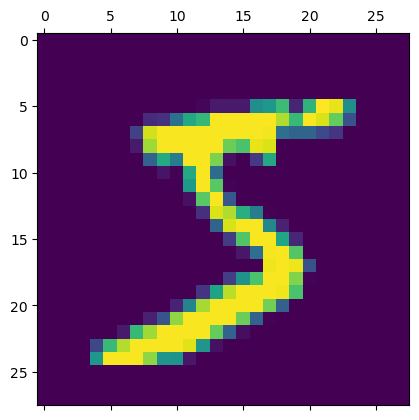

In [4]:
plt.matshow(X_train[0])

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [7]:
X_train_flattened.shape

(60000, 784)

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=20, callbacks=[tensorboard_callback])

C:\Users\91753\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8725 - loss: 0.4575
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9610 - loss: 0.1321
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9737 - loss: 0.0882
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9802 - loss: 0.0664
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9849 - loss: 0.0499
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9880 - loss: 0.0392
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9896 - loss: 0.0316
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9923 - loss: 0.0263
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9935 - loss: 0.0215
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9947 - loss: 0.0173
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9954 - loss: 0.0156
Epoch 12/20
1875/1875 ━━━━━━━

In [9]:
#%load_ext tensorboard
#%tensorboard --logdir logs/fit

In [10]:
#from torch.utils.tensorboard import SummaryWriter
#writer = SummaryWriter(log_dir="logs/fit")
# Add logging statements here
#writer.close()

In [11]:
#tensorboard --logdir=logs/fit

In [36]:
loss, accuracy=model.evaluate(X_test, y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9746 - loss: 0.1355
0.9786999821662903


In [38]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.9786999821662903


In [44]:
predictions = model.predict(X_test)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[9.3161383e-08, 1.1052584e-06, 2.6825303e-03, ..., 9.9999994e-01,
        4.5038112e-05, 8.0715576e-03],
       [2.1595348e-09, 1.1589117e-03, 1.0000000e+00, ..., 3.9093024e-20,
        4.6865802e-02, 7.7372202e-13],
       [6.4462209e-09, 9.9995422e-01, 1.8860755e-02, ..., 6.5146267e-02,
        1.3030688e-01, 4.6434357e-07],
       ...,
       [1.2272486e-19, 3.9280321e-09, 1.2029208e-13, ..., 8.1168103e-01,
        4.9628173e-03, 9.1357470e-01],
       [3.7618719e-08, 8.3181658e-05, 5.4075587e-15, ..., 1.7574537e-07,
        9.8839313e-01, 1.0651846e-12],
       [3.1280251e-07, 1.6059750e-17, 3.9839069e-06, ..., 1.0535855e-10,
        9.7237169e-09, 1.4835411e-08]], dtype=float32)

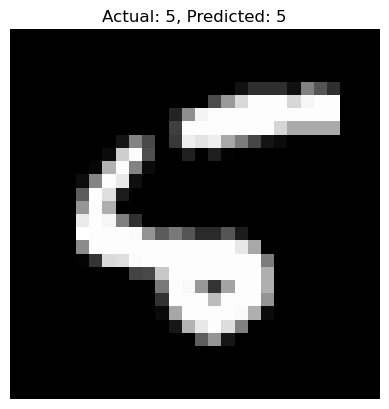

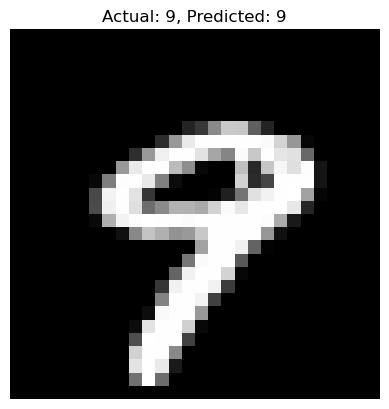

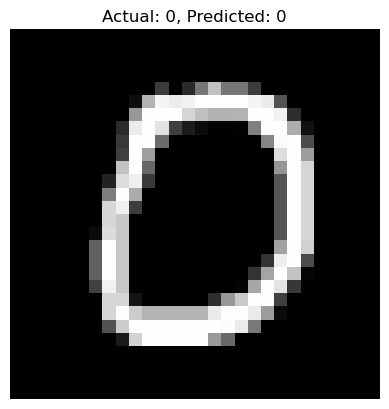

In [52]:
for i in range(8,11):
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Actual: {y_test[i]}, Predicted: {np.argmax(predictions[i])}')
    plt.axis('off')
    plt.show()